# K-Means Clustering


unsupervised learning - clustering customer data.

## The Data

LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   This dataset is public available for research. The details are described in [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Available at: [pdf] http://hdl.handle.net/1822/14838
                    [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     For more information, read [Moro et al., 2011].

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("../DATA/bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Continuous Feature Analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

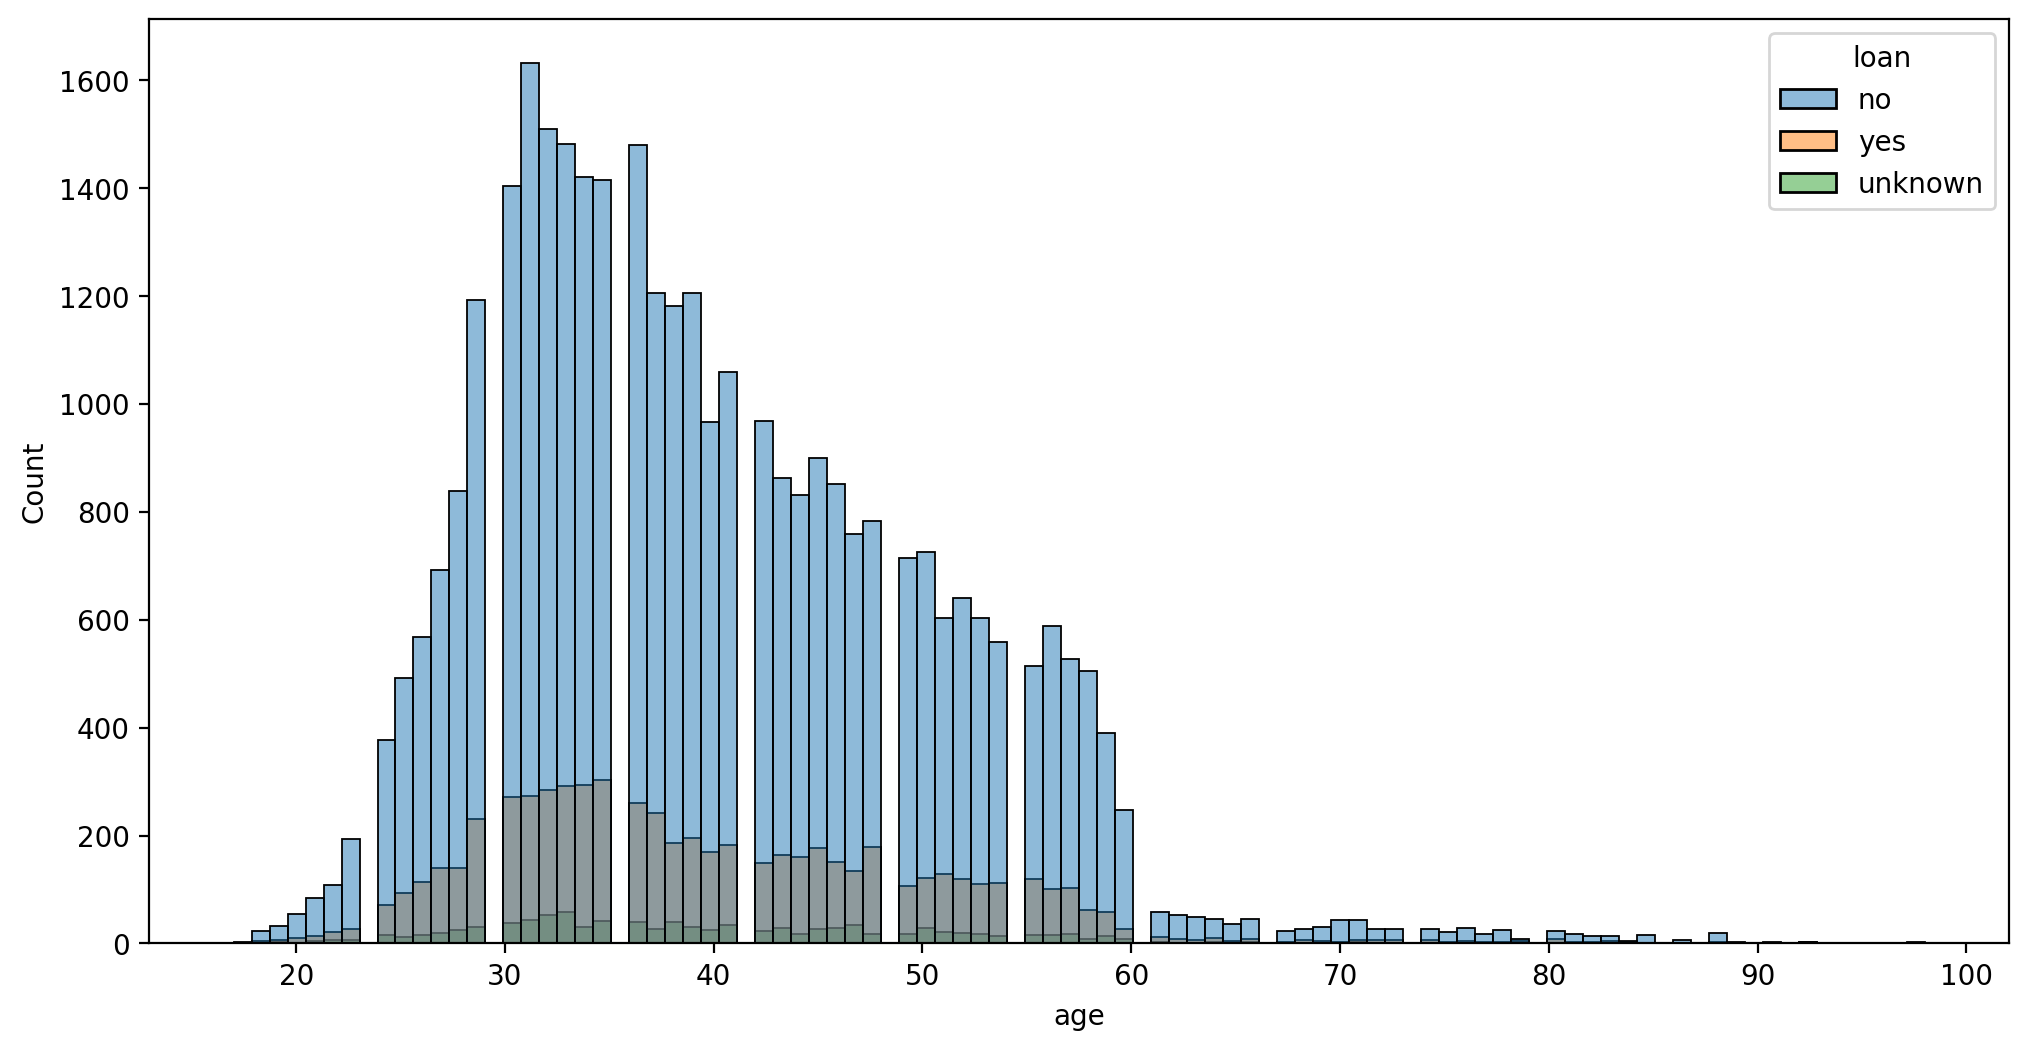

In [6]:
# age distribution with loan percentage

plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',hue='loan')

<AxesSubplot:xlabel='pdays', ylabel='Count'>

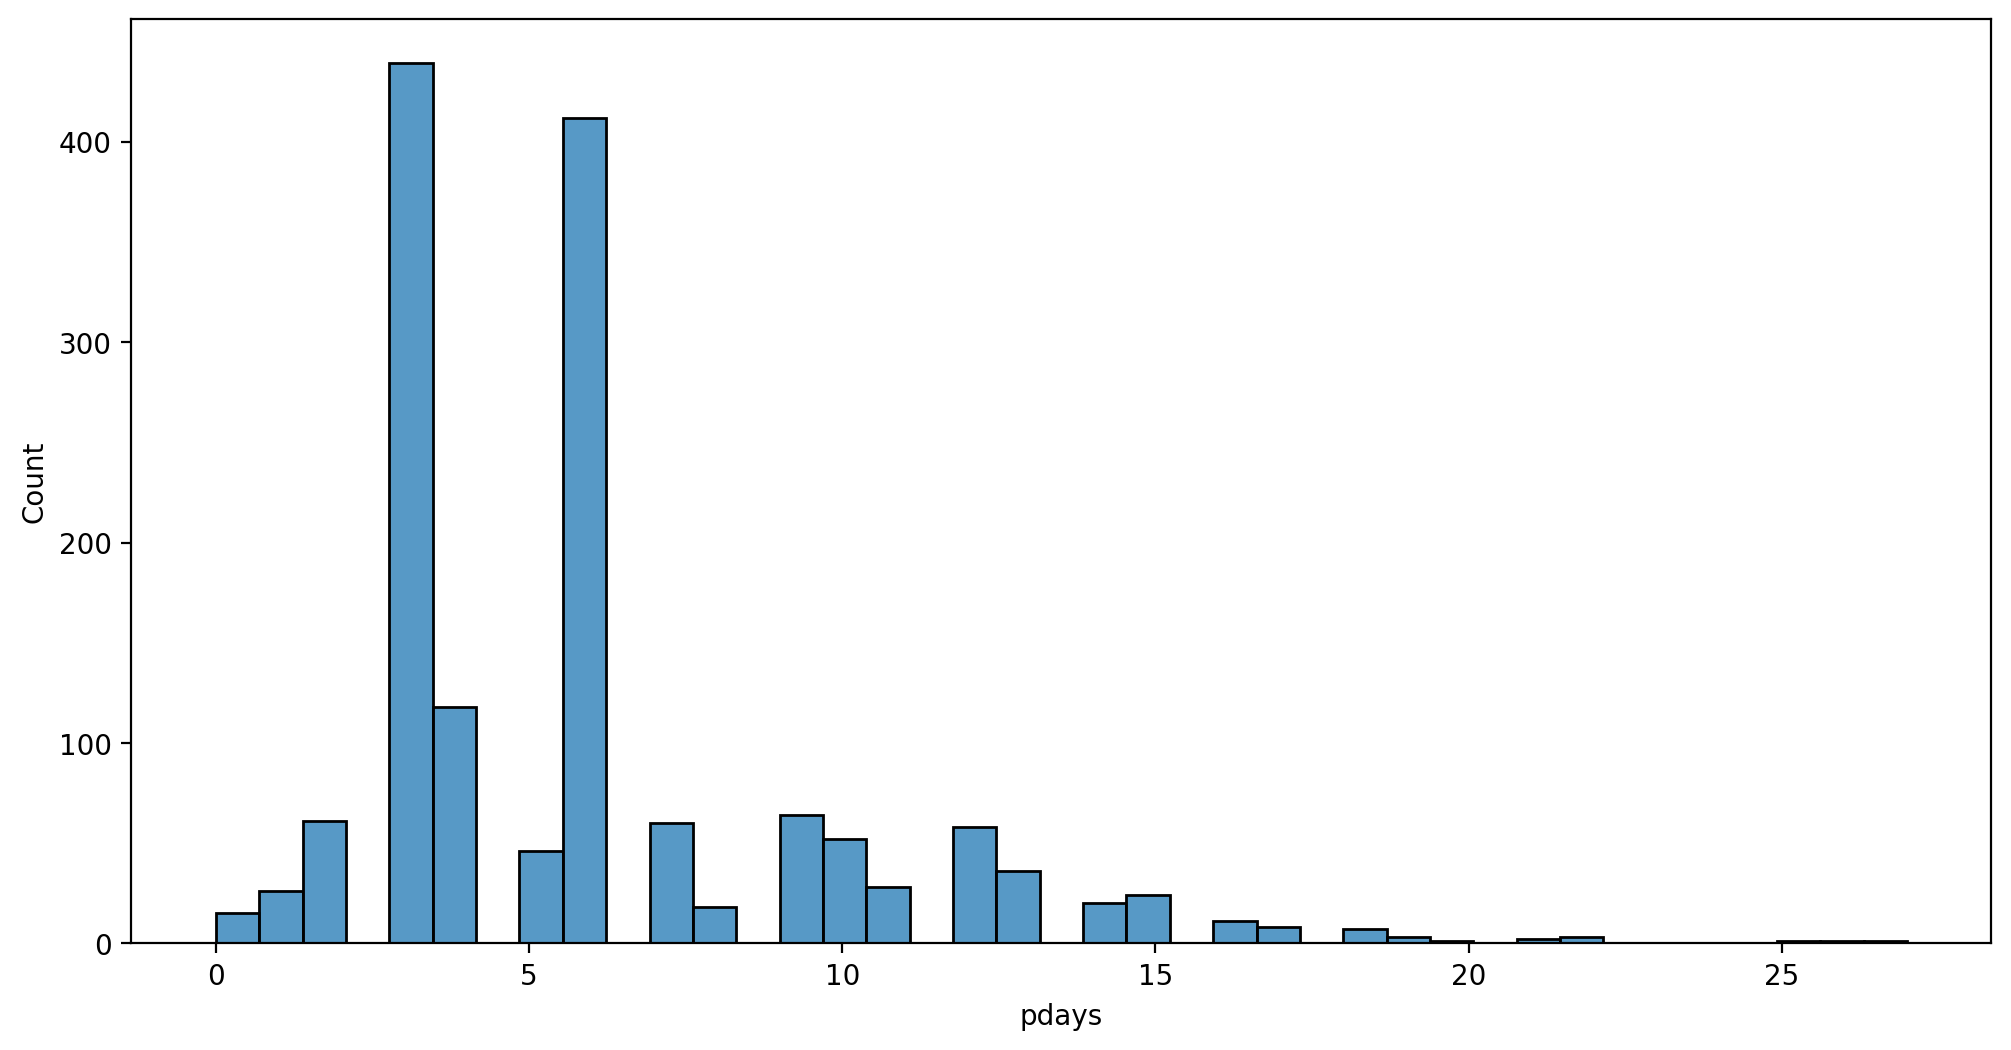

In [7]:
# df['pdays'==999] means client was not previously contacted

plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays')

**Contact duration - contact with customer made, how long did call last?**

(0.0, 2000.0)

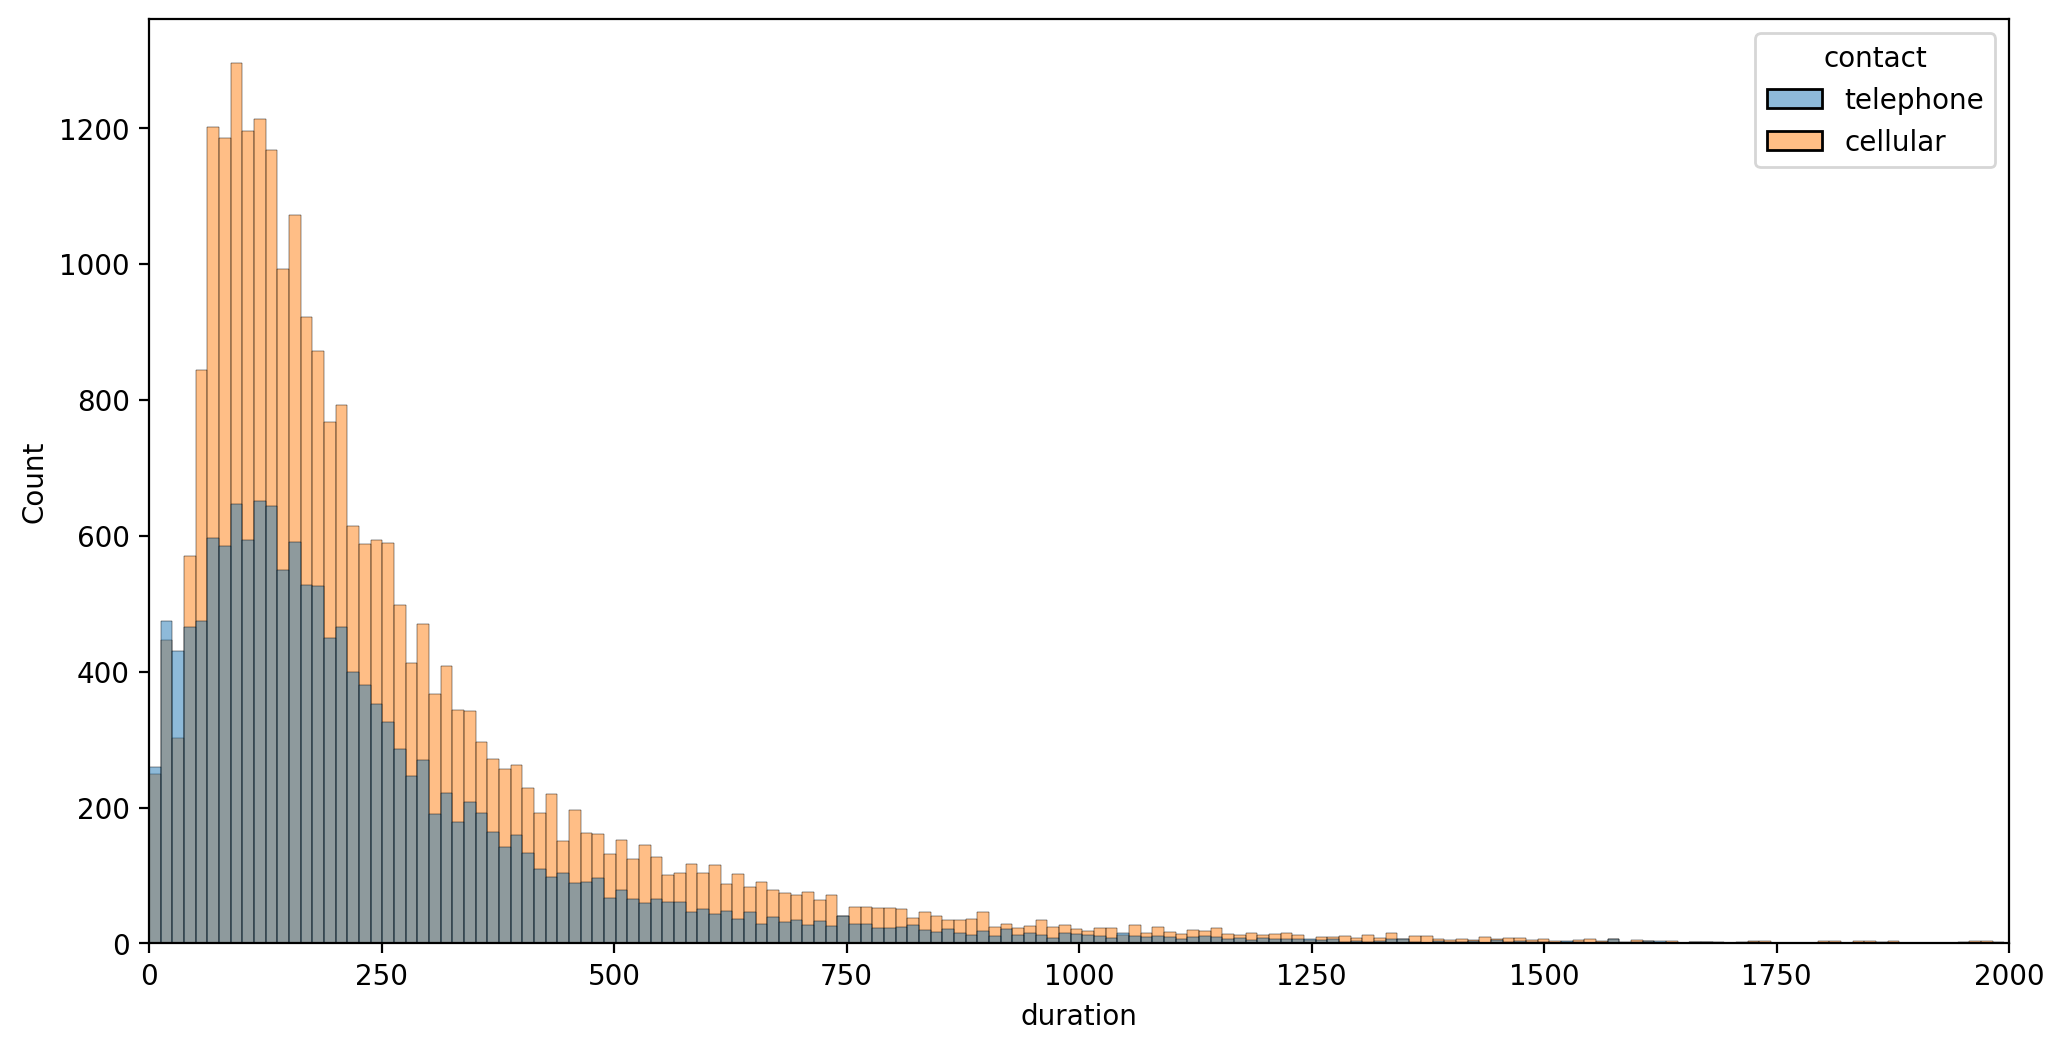

In [8]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,2000)

* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

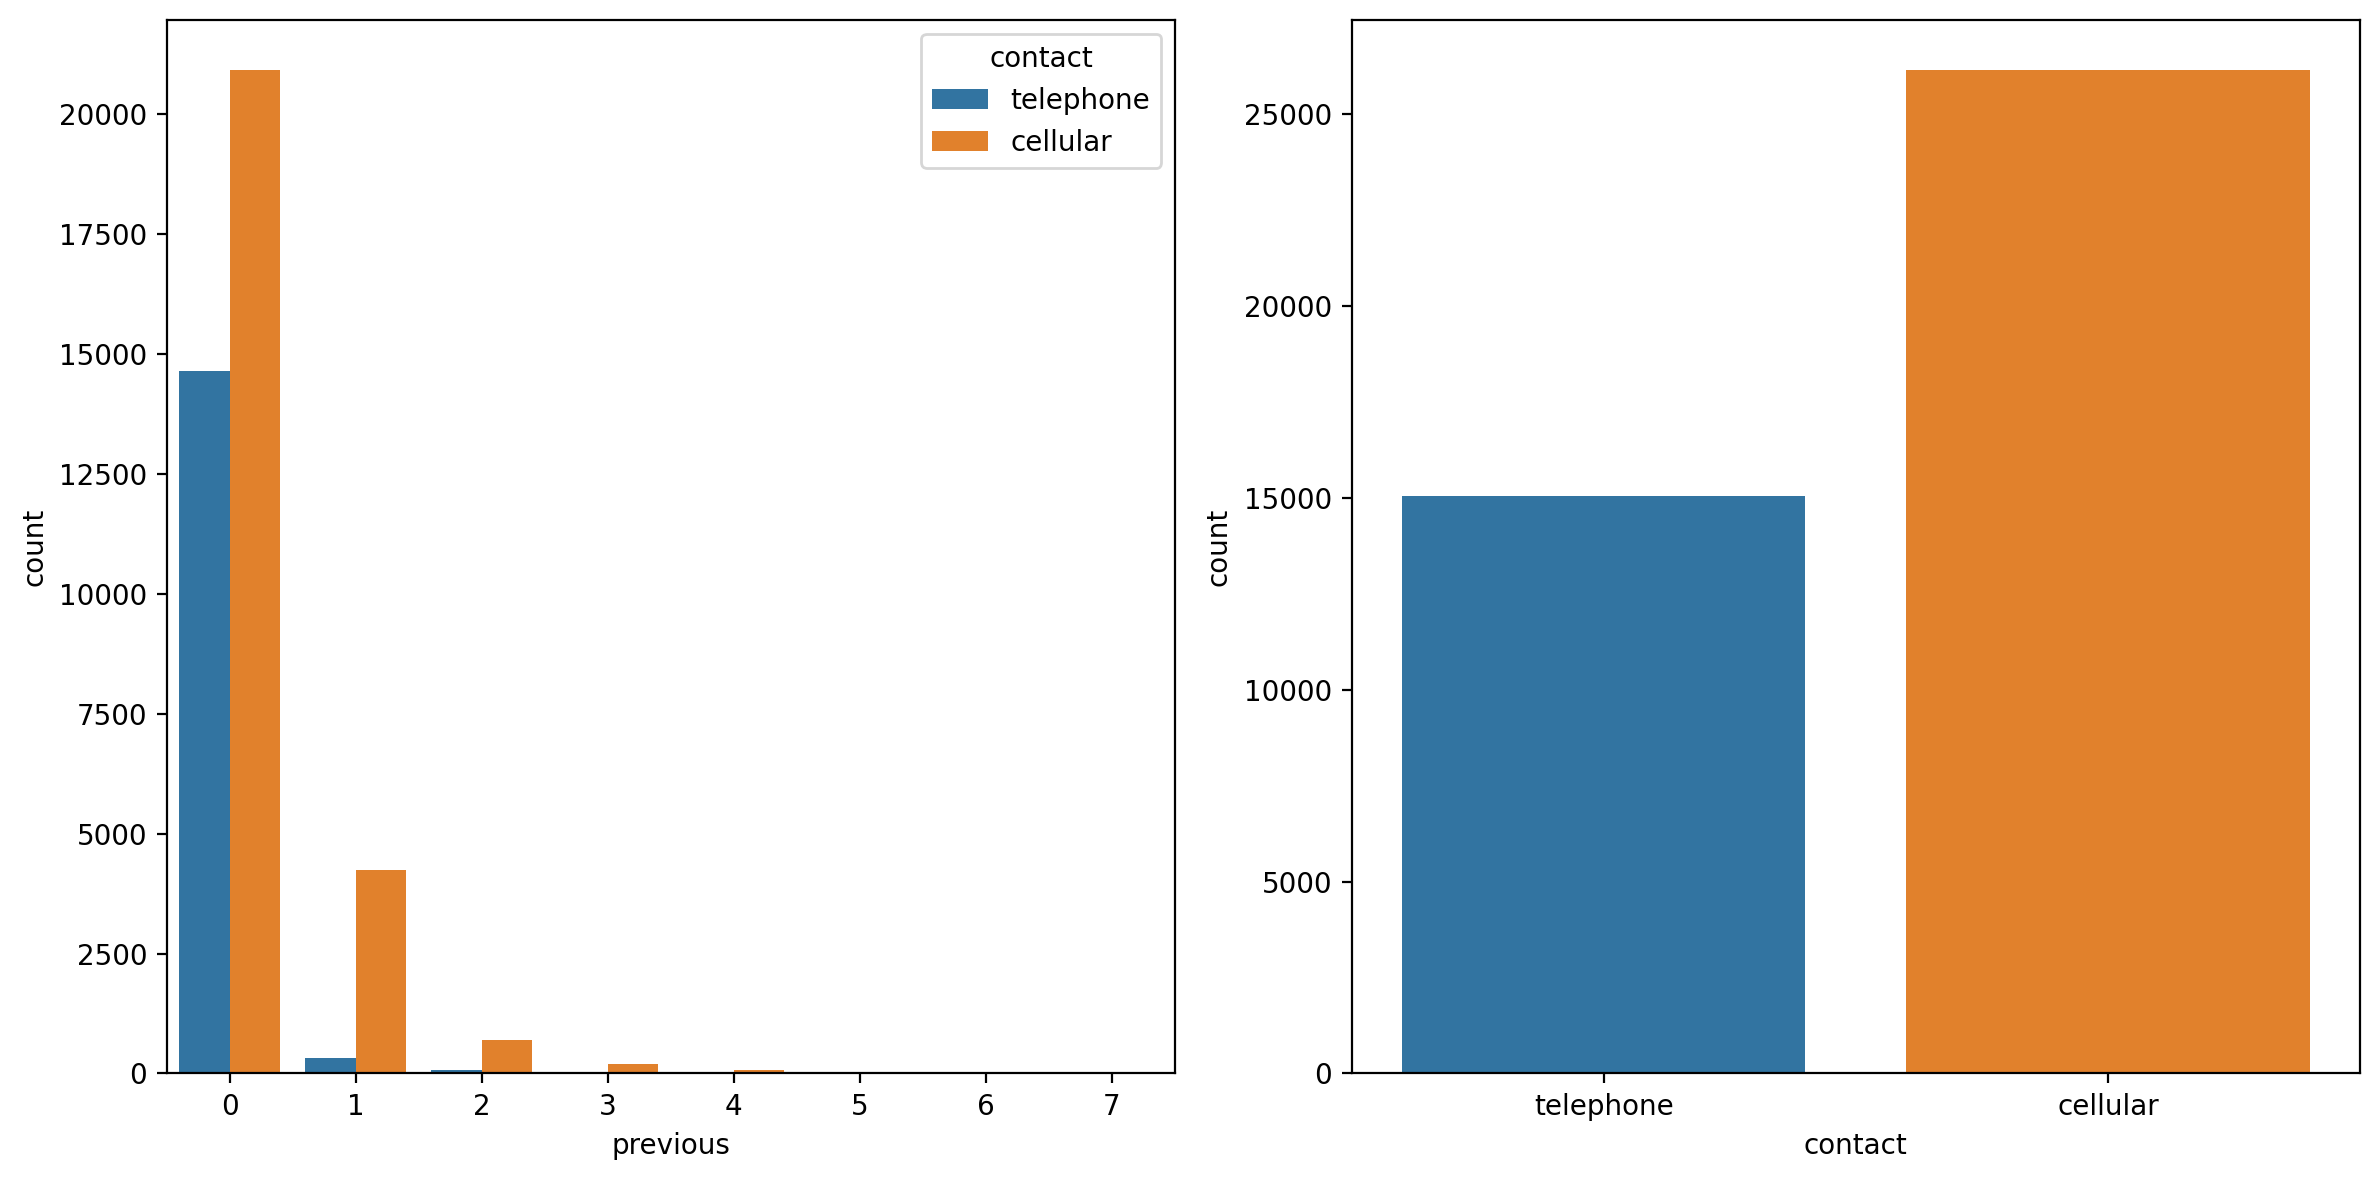

In [9]:
plt.figure(figsize=(12, 6), dpi=200)

# First subplot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='previous', hue='contact')

# Second subplot
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='contact', hue = "contact")

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()

Average call duration time shows the same trend for both telephone and cellular. More people use cellular than telephone, making the count for cellular much higher. 

## Clustering

### Data Preparation

**UNSUPERVISED LEARNING: NO NEED TO TRAIN TEST SPLIT!! NO LABEL TO "TEST" AGAINST!**

We do however need to **transform categorical features into numeric ones** where it makes sense to do so, as well as **scaling the data** due to distance being a key factor in clustering.

In [10]:
X = pd.get_dummies(df)

In [11]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Creating and Fitting a KMeans Model

Note of the method choices here:

* fit(X[, y, sample_weight])
    * Compute k-means clustering.

* fit_predict(X[, y, sample_weight])
    * Compute cluster centers and predict cluster index for each sample.

* fit_transform(X[, y, sample_weight])
    * Compute clustering and transform X to cluster-distance space.

* predict(X[, sample_weight])
    * Predict the closest cluster each sample in X belongs to.

In [13]:
from sklearn.cluster import KMeans

In [14]:
model = KMeans(n_clusters=2)

**fit():**

To compute the centroids and assign cluster labels to the input data.

When you call fit on a KMeans model, it takes your input data and performs the clustering algorithm, determining the cluster centers and assigning each data point to a cluster.

In the case of KMeans, after calling fit, the model is trained on the data, and the **cluster centers are determined** based on the input features.

``
model.fit(scaled_X)
``

**transform():**

To assign each data point to a cluster based on the centroids learned during the fitting stage.

After calling fit, you can use transform to obtain the cluster labels for each data point in the original dataset.

It transforms the **input data points into the cluster space based on the centroids** found during the fitting process.

``
cluster_labels = model.transform(scaled_X)
``

**fit_transform**

Combines both the fitting and transforming steps into one call.

``
cluster_labels = model.fit_transform(scaled_X)
``

In summary, fit is used to train the model and compute the centroids, while transform is used to assign cluster labels to data points based on the centroids obtained during training.


**fit_predict**

Both the fitting of the model on the input data and the prediction of cluster labels for each data point in a single step. 

This method is commonly used when you want to obtain cluster labels directly after fitting the model.

``
cluster_labels = model.fit_predict(scaled_X)
``

**Note**

You typically do **not use fit_transform in the context of K-Means clustering**. 

K-Means clustering in scikit-learn follows the fit-predict paradigm.


In [15]:
# fit() vs transform()
cluster_labels = model.fit_predict(scaled_X)

In [16]:
# IMPORTANT NOTE: 0s and 1s may be different each time you run the code,
# the number values are not significant
cluster_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [17]:
len(scaled_X)

41188

In [18]:
len(cluster_labels)

41188

In [19]:
X['Cluster'] = cluster_labels

<AxesSubplot:>

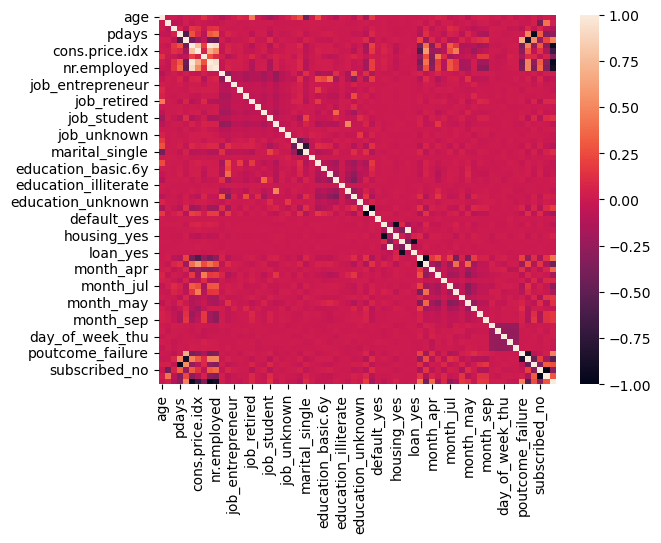

In [20]:
sns.heatmap(X.corr())

In [21]:
X.corr()['Cluster']

age                    -0.019694
duration                0.039533
campaign               -0.129129
pdays                  -0.267700
previous                0.478467
                          ...   
poutcome_nonexistent   -0.544377
poutcome_success        0.254393
subscribed_no          -0.294449
subscribed_yes          0.294449
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

<AxesSubplot:>

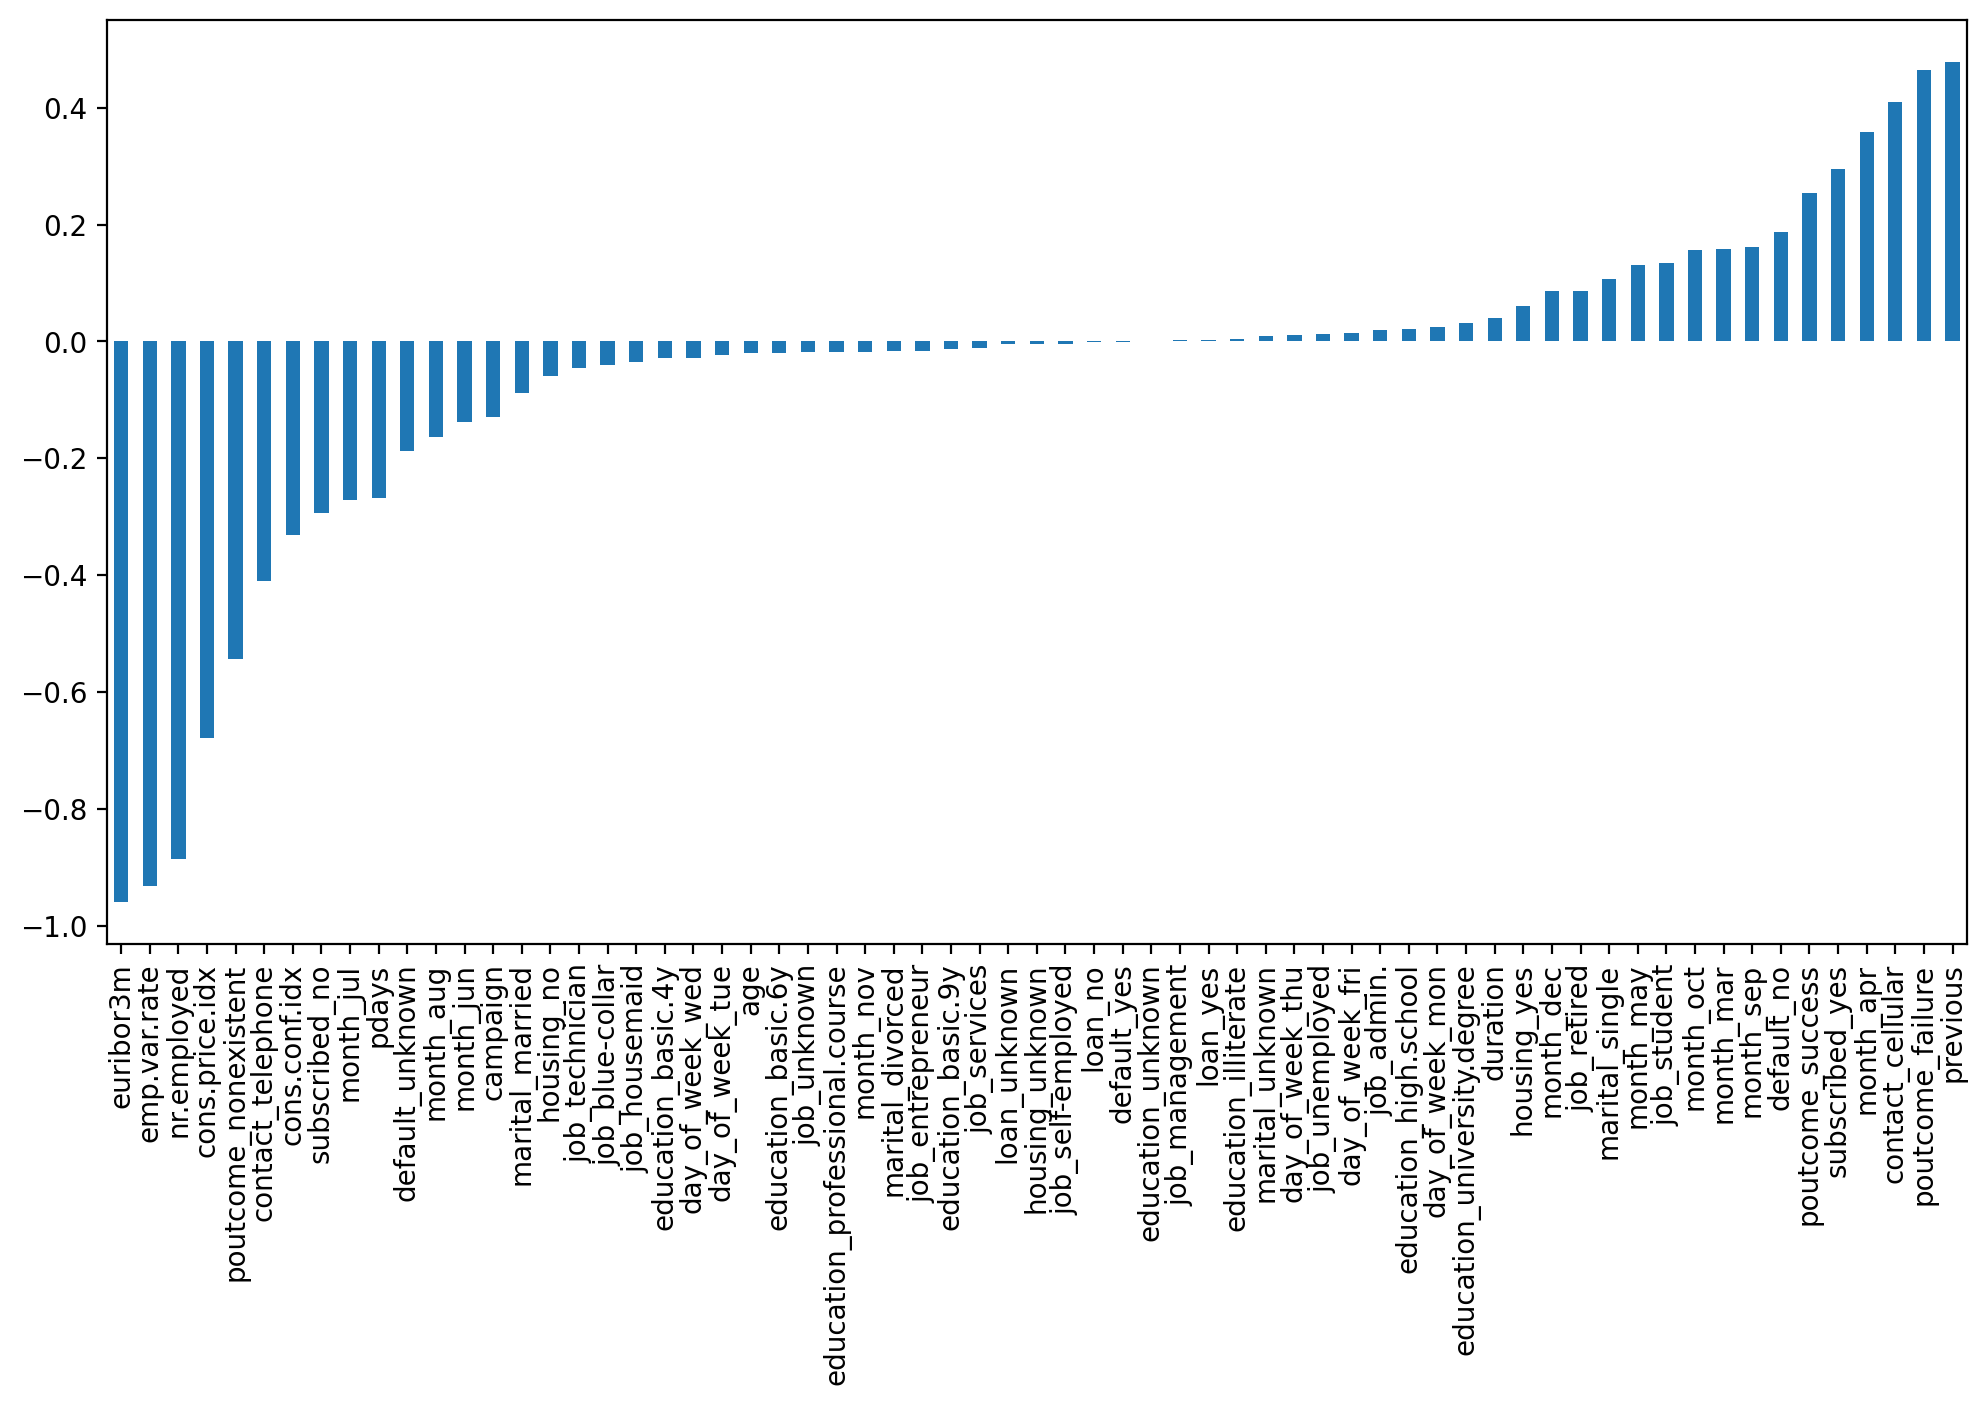

In [22]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

## Choosing K Value

In [23]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

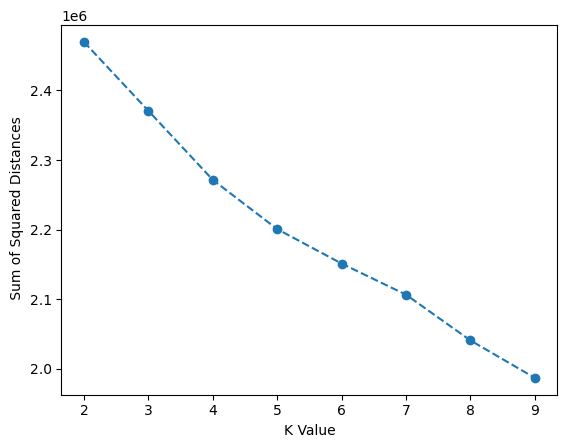

In [24]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances")

Analyzing SSE Reduction

In [25]:
ssd

[2469792.361662754,
 2370786.888414882,
 2271504.0813764823,
 2200693.7719685826,
 2151167.1682897443,
 2106404.665896204,
 2040673.5018204239,
 1986760.6579079444]

In [26]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0             NaN
1   -99005.473248
2   -99282.807038
3   -70810.309408
4   -49526.603679
5   -44762.502394
6   -65731.164076
7   -53912.843912
dtype: float64

Big drop at index 5, meaning k = 6 so we can choose optimal k to be 5 or 6. 

<AxesSubplot:>

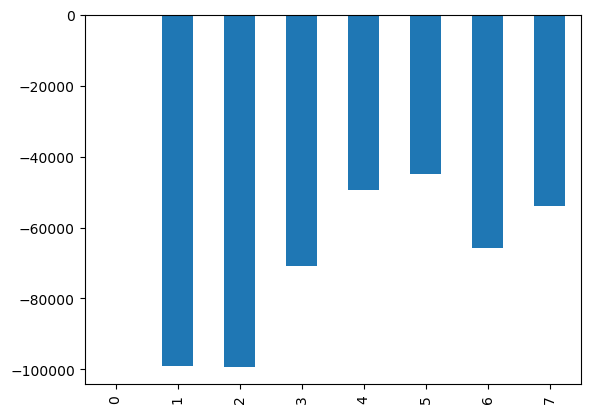

In [27]:
pd.Series(ssd).diff().plot(kind='bar')